# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [65]:
#Type your code here

df = pd.read_csv("../covid19-patient-symptoms-diagnosis_raw.csv")

df.head()

,patient_id,age,gender,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,comorbidity,travel_history,contact_with_patient,chest_pain,covid_result
0,1,52,Male,1,0,1,1,0,0,0,0,98,37.1,Diabetes,0,0,0,0
1,2,15,Male,0,0,0,1,1,0,0,0,85,37.7,Diabetes,0,1,0,0
2,3,72,Male,1,0,1,0,0,1,0,1,99,36.8,NaN,0,0,0,0
3,4,61,Female,0,0,1,1,1,0,1,1,86,36.0,NaN,1,0,0,0
4,5,21,Female,1,1,0,0,0,1,0,1,90,36.4,NaN,1,1,1,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [66]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   fever                 5000 non-null   int64  
 4   dry_cough             5000 non-null   int64  
 5   sore_throat           5000 non-null   int64  
 6   fatigue               5000 non-null   int64  
 7   headache              5000 non-null   int64  
 8   shortness_of_breath   5000 non-null   int64  
 9   loss_of_smell         5000 non-null   int64  
 10  loss_of_taste         5000 non-null   int64  
 11  oxygen_level          5000 non-null   int64  
 12  body_temperature      5000 non-null   float64
 13  comorbidity           2275 non-null   object 
 14  travel_history        5000 non-null   int64  
 15  contact_with_patient 

In [67]:
df.describe()

,patient_id,age,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,travel_history,contact_with_patient,chest_pain,covid_result
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,44.380600,0.567400,0.493200,0.416000,0.589800,0.444800,0.348400,0.299400,0.292800,91.934200,38.500480,0.250600,0.400000,0.306000,0.52000
std,1443.520003,25.551632,0.495486,0.500004,0.492943,0.491919,0.496993,0.476511,0.458041,0.455093,4.300275,1.431892,0.433402,0.489947,0.460876,0.49965
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,36.000000,0.000000,0.000000,0.000000,0.00000
25%,1250.750000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,37.300000,0.000000,0.000000,0.000000,0.00000
50%,2500.500000,44.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,92.000000,38.500000,0.000000,0.000000,0.000000,1.00000
75%,3750.250000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000,39.700000,1.000000,1.000000,1.000000,1.00000
max,5000.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,41.000000,1.000000,1.000000,1.000000,1.00000


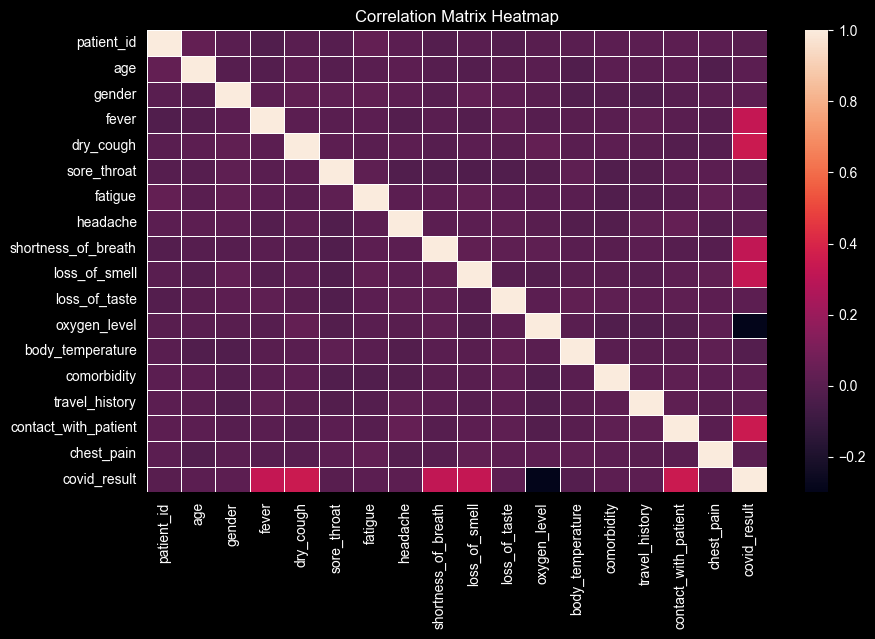

In [68]:
df_copy = pd.DataFrame(df)
df_copy["comorbidity"] = df_copy["comorbidity"].fillna("None")
category_columns = df_copy.select_dtypes(include=['object']).columns
for category in category_columns:
    df_copy[category] = LabelEncoder().fit_transform(df_copy[category])

corr_matrix = df_copy.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

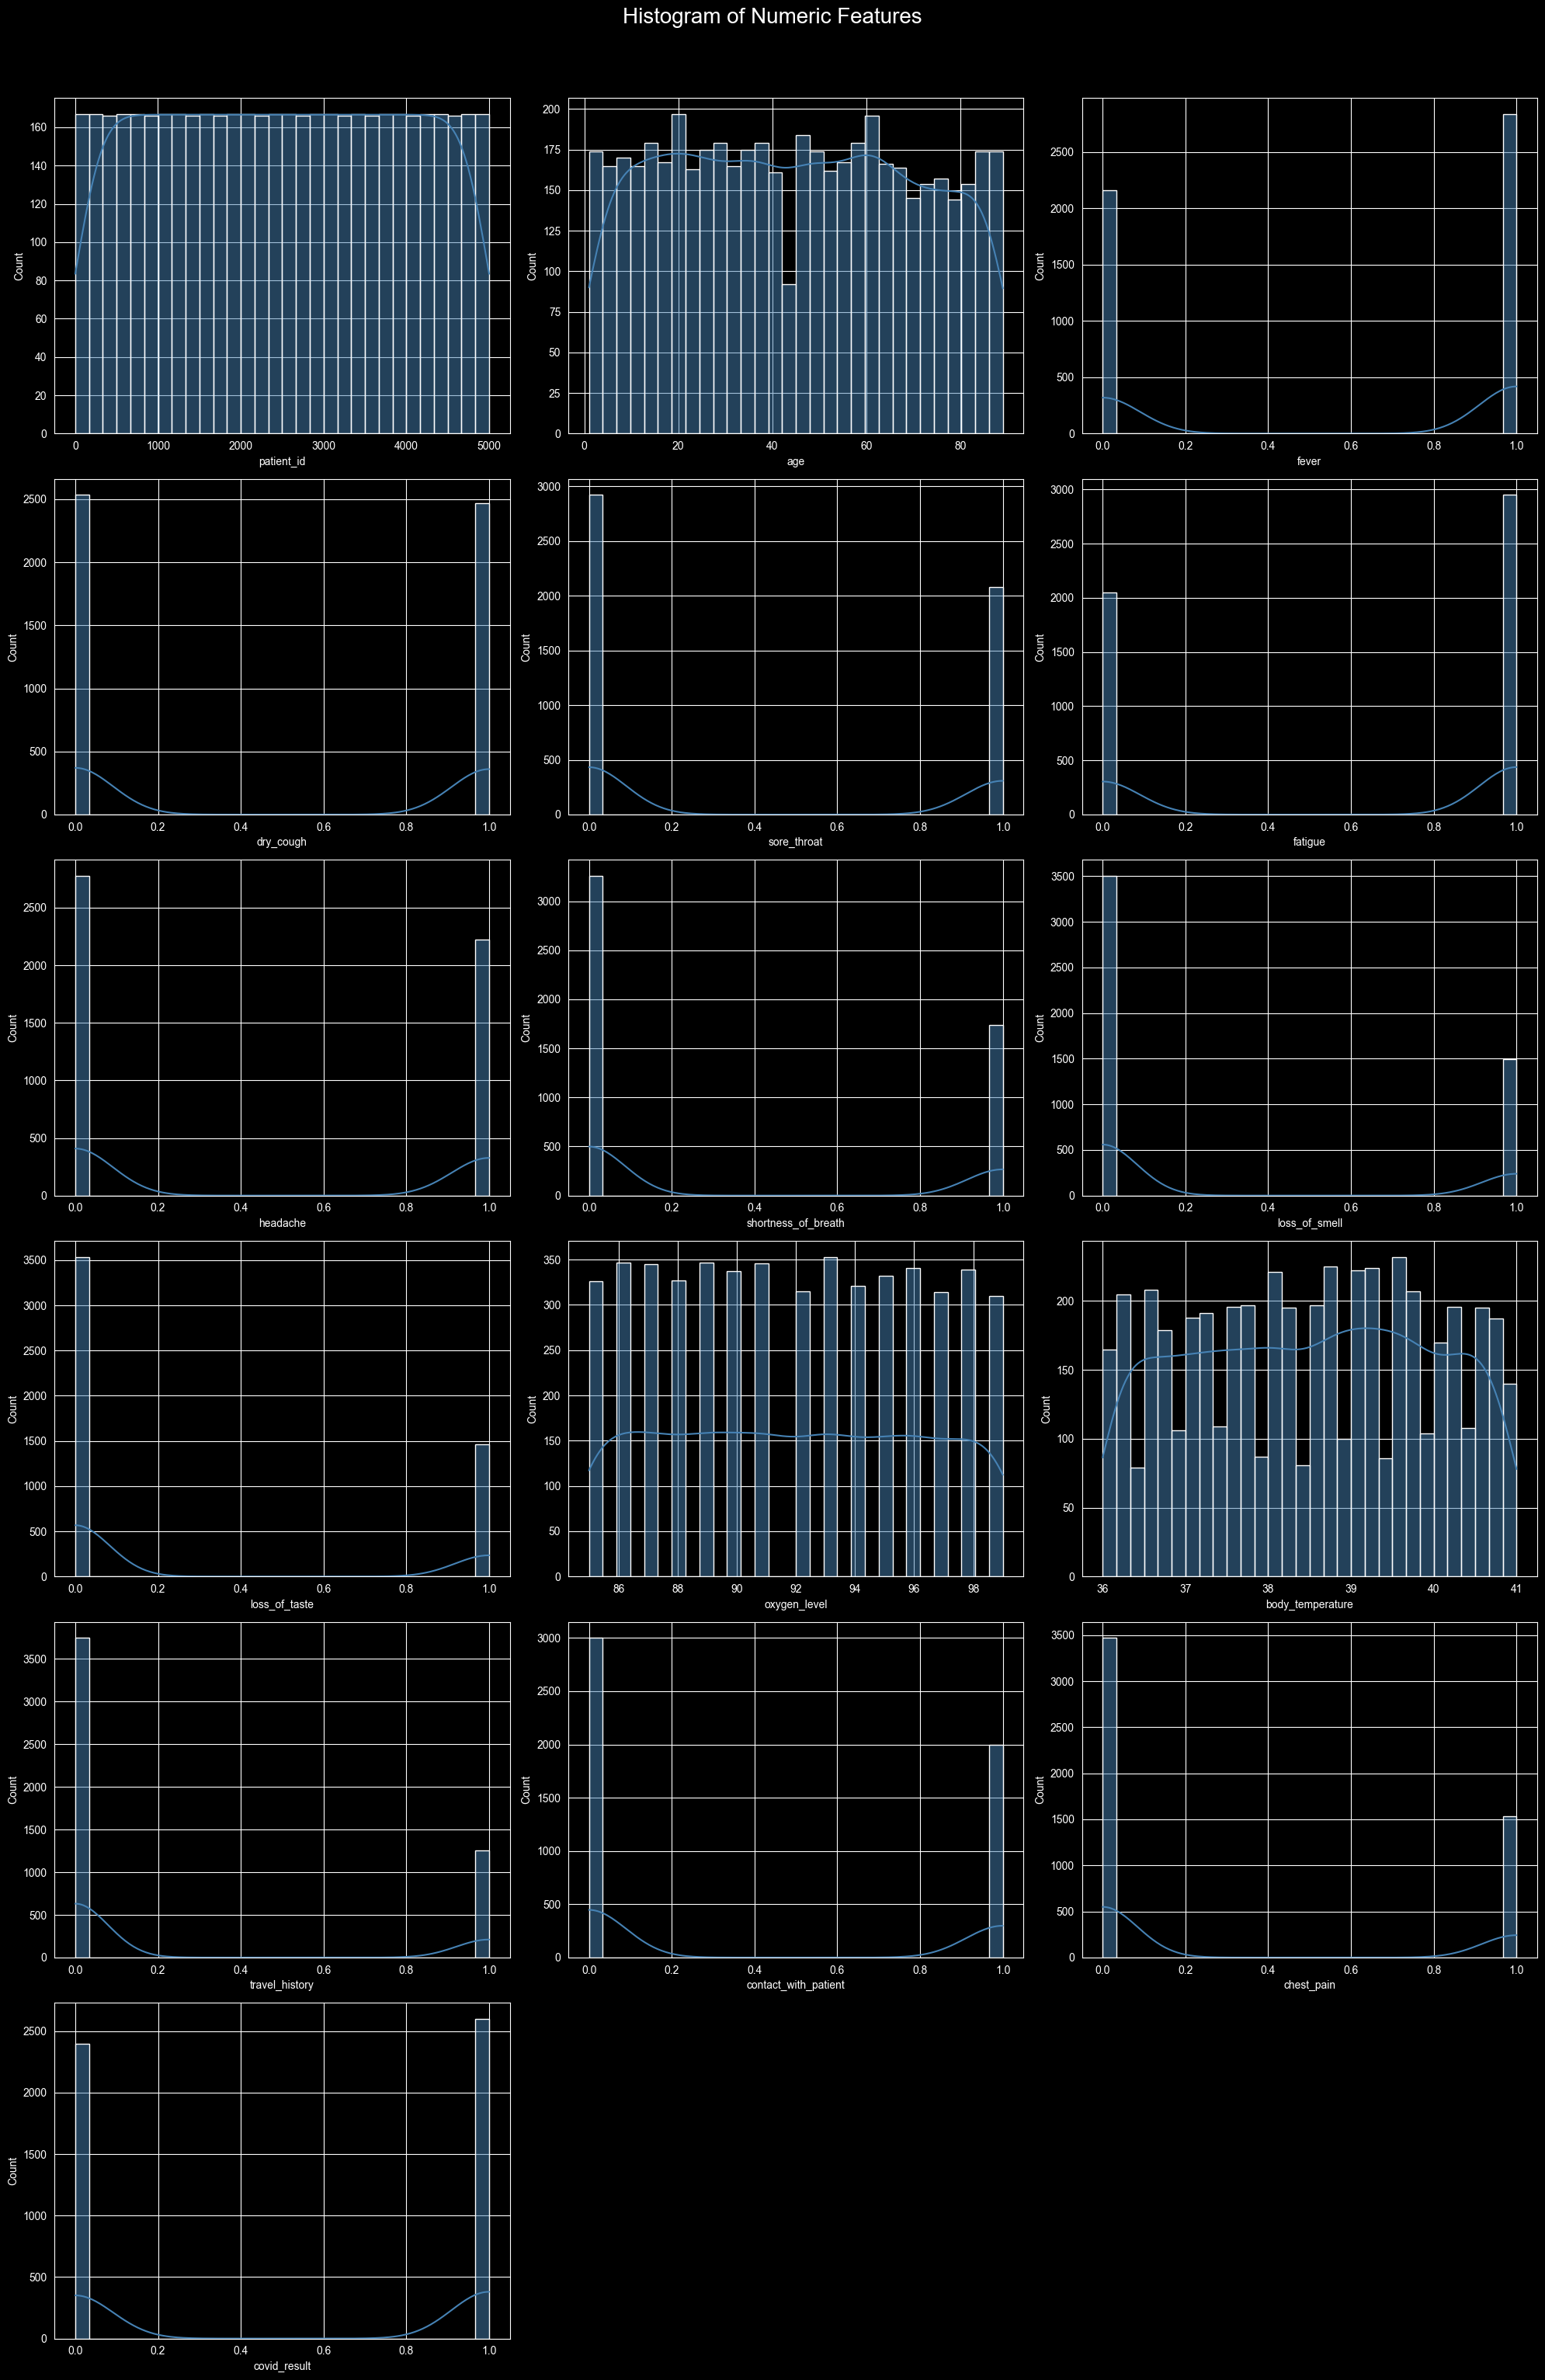

In [69]:
numeric_columns = df.select_dtypes(include=['number']).columns
n_col = 3
n_row = numeric_columns.shape[0] // n_col + 1

fig, axes = plt.subplots(n_row, n_col, figsize=(20, n_row * 5))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i], color="steelblue")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histogram of Numeric Features", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

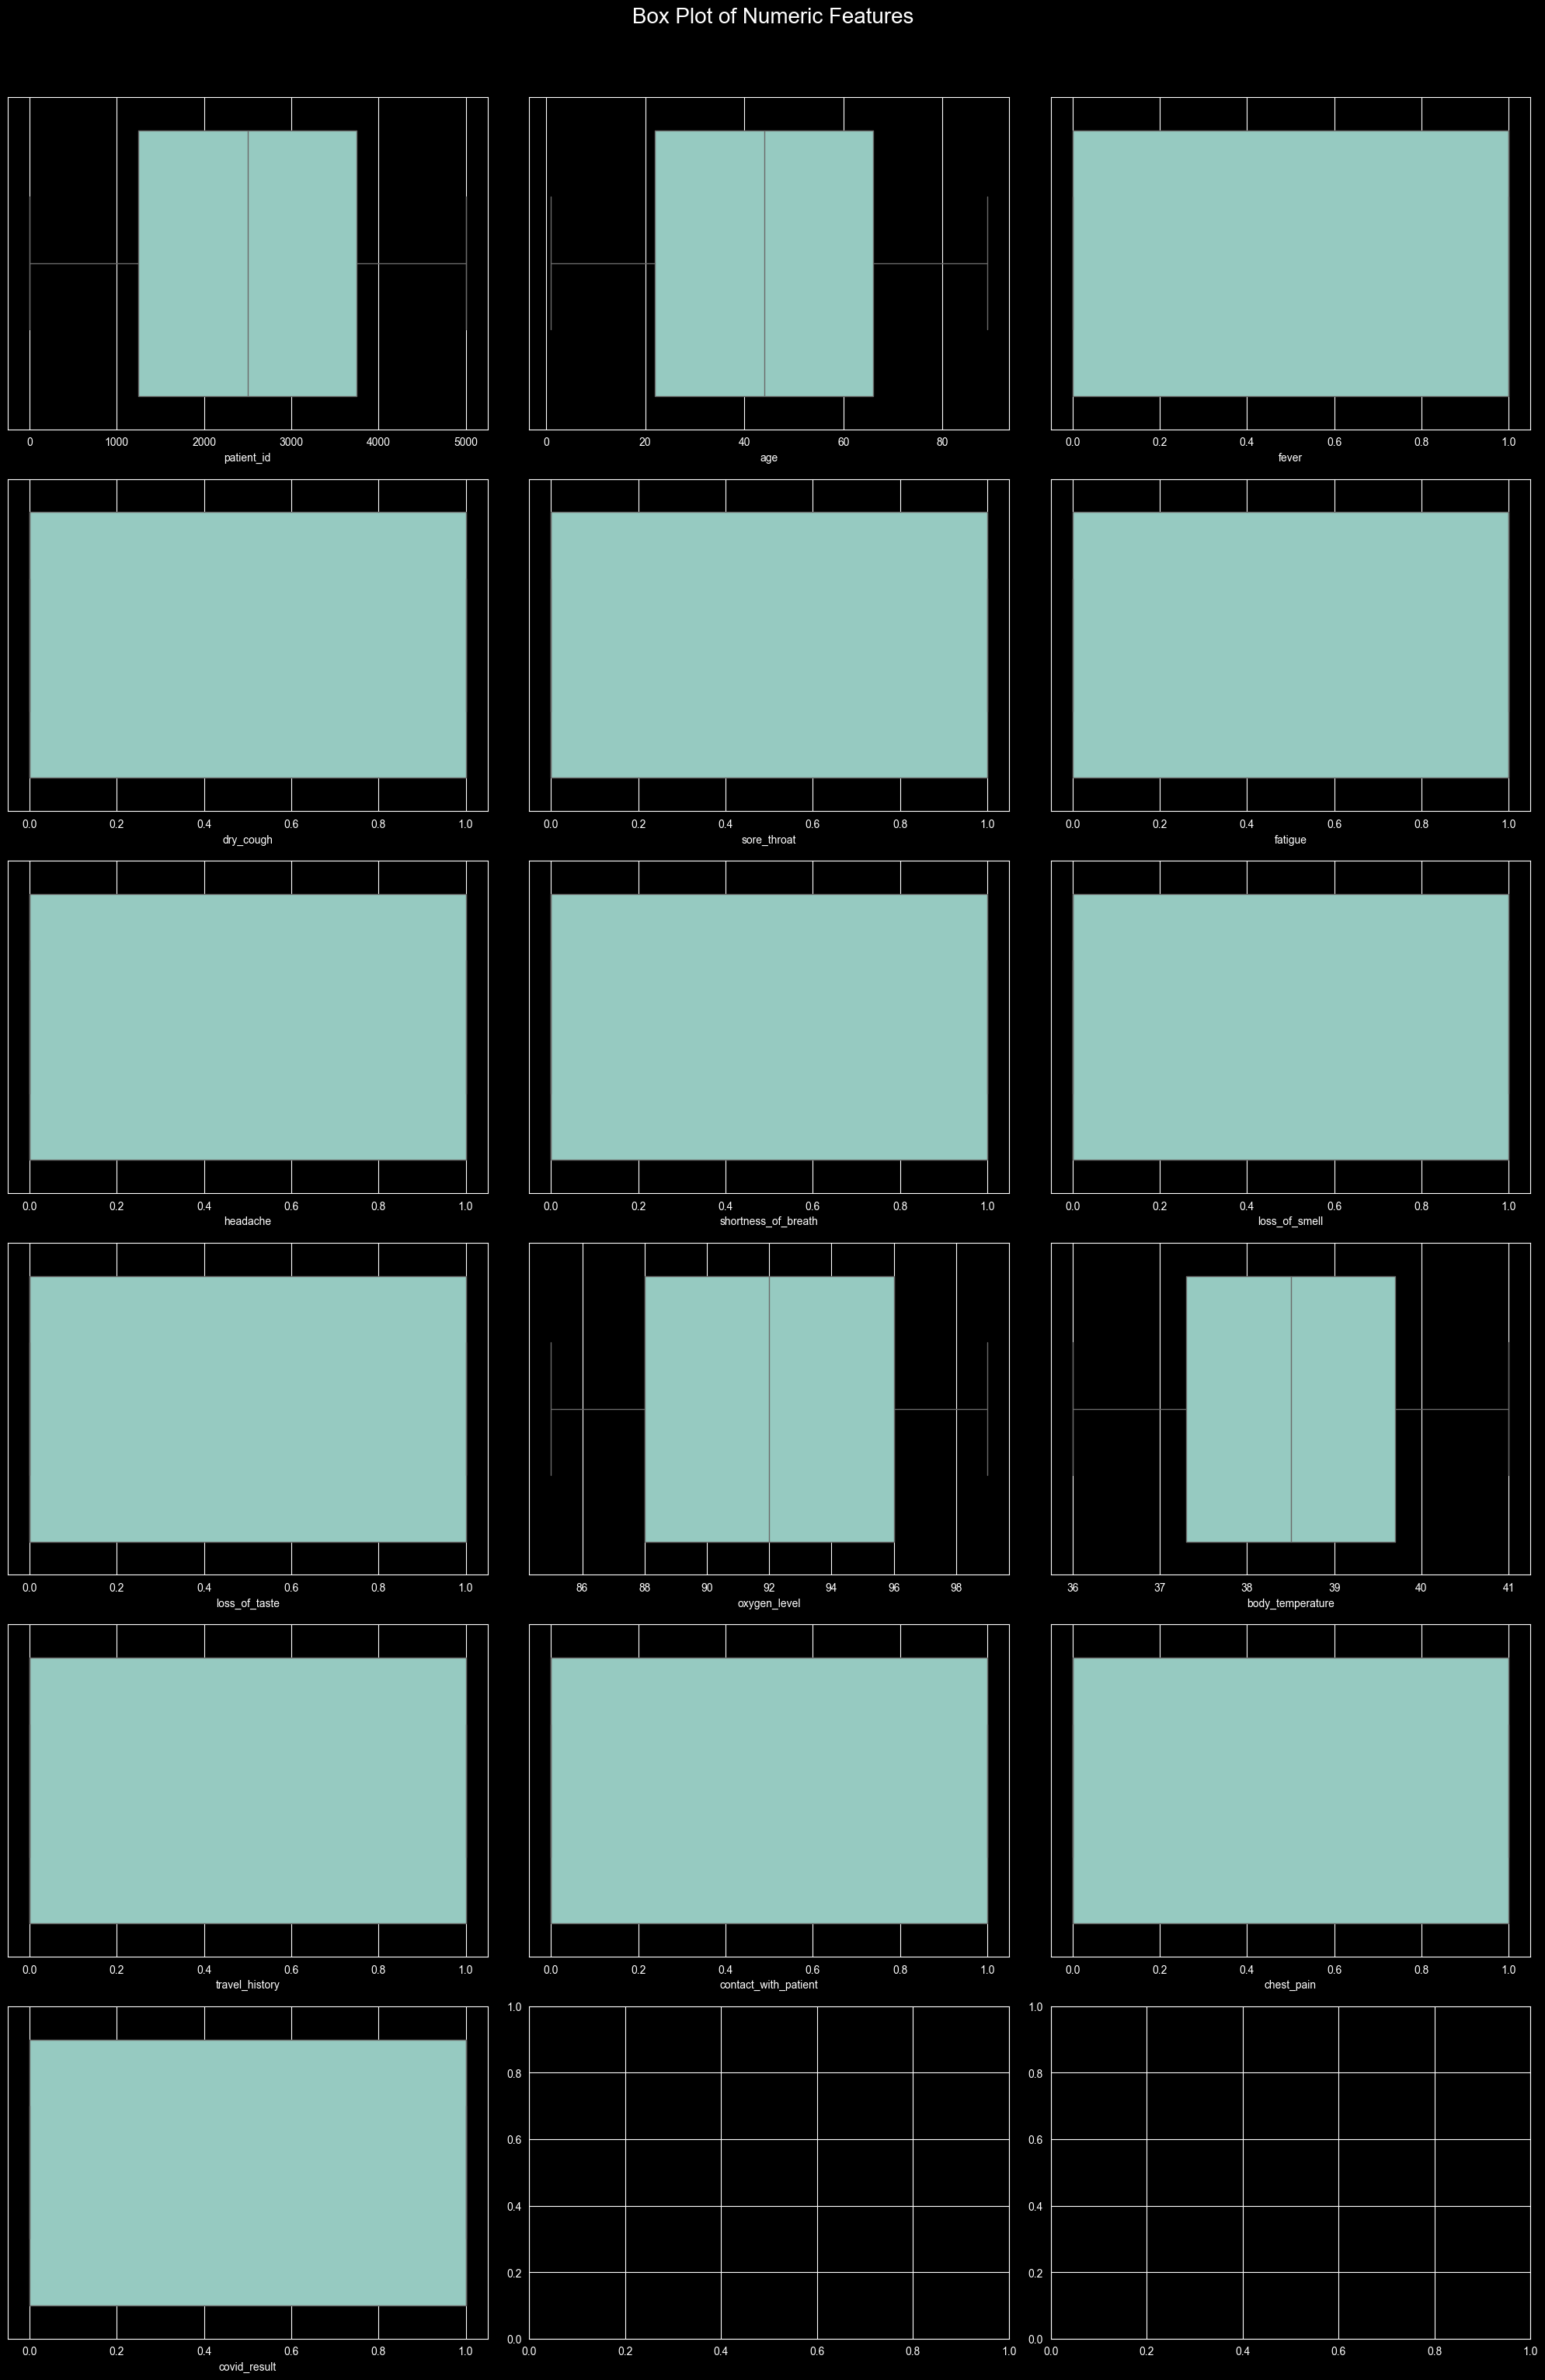

In [70]:
n_col = 3
n_row = numeric_columns.shape[0] // n_col + 1

fig, axes = plt.subplots(n_row, n_col, figsize=(20, n_row * 5))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
  sns.boxplot(x=df[column], ax=axes[i])

plt.suptitle("Box Plot of Numeric Features", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

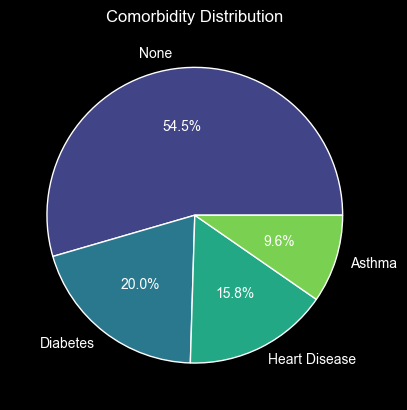

In [71]:
df_copy = pd.DataFrame(df)

df_copy["comorbidity"] = df_copy["comorbidity"].fillna("None")
comobidty_counts = df_copy["comorbidity"].value_counts()
comobidty_labels = comobidty_counts.index
colors = sns.color_palette("viridis", len(comobidty_counts))

plt.pie(comobidty_counts, labels=comobidty_labels, colors=colors, autopct='%1.1f%%')
plt.title("Comorbidity Distribution")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Menghapus Fitur patient_id

In [72]:
df_cleaned = pd.DataFrame(df)

df_cleaned.drop("patient_id", axis=1, inplace=True)
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

df_cleaned.head()

,age,gender,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,comorbidity,travel_history,contact_with_patient,chest_pain,covid_result
0,52,Male,1,0,1,1,0,0,0,0,98,37.1,Diabetes,0,0,0,0
1,15,Male,0,0,0,1,1,0,0,0,85,37.7,Diabetes,0,1,0,0
2,72,Male,1,0,1,0,0,1,0,1,99,36.8,NaN,0,0,0,0
3,61,Female,0,0,1,1,1,0,1,1,86,36.0,NaN,1,0,0,0
4,21,Female,1,1,0,0,0,1,0,1,90,36.4,NaN,1,1,1,1


## Menangani Data Kosong

In [73]:
df_cleaned["comorbidity"] = df_cleaned["comorbidity"].fillna("None")
df_cleaned.dropna(inplace=True)

missing_values = df_cleaned.isnull().sum().reset_index()
missing_values.columns = ["Feature", "Missing Value"]
missing_values

,Feature,Missing Value
0,age,0
1,gender,0
2,fever,0
3,dry_cough,0
4,sore_throat,0
5,fatigue,0
6,headache,0
7,shortness_of_breath,0
8,loss_of_smell,0
9,loss_of_taste,0


## Menangani Data Duplikat

In [74]:
df_cleaned.drop_duplicates(inplace=True)

total_duplicated = df_cleaned.duplicated().sum()
f"Total Duplicated Data: {total_duplicated}"

'Total Duplicated Data: 0'

## Menangani Outlier

In [75]:
for column in numeric_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[column] >= lower) & (df_cleaned[column] <= upper)]

outlier_counts = {}
for column in numeric_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_counts[column] = ((df_cleaned[column] < lower) | (df_cleaned[column] > upper)).sum()

outlier_df_cleaned = pd.DataFrame(list(outlier_counts.items()), columns=["Feature", "Outlier Count"])
outlier_df_cleaned

,Feature,Outlier Count
0,age,0
1,fever,0
2,dry_cough,0
3,sore_throat,0
4,fatigue,0
5,headache,0
6,shortness_of_breath,0
7,loss_of_smell,0
8,loss_of_taste,0
9,oxygen_level,0


## Standarisasi Data Numerik

In [76]:
df_encoded = pd.DataFrame(df_cleaned)
selected_features = ["age", "oxygen_level", "body_temperature"]
selected_numeric_columns = pd.Index(selected_features)

df_encoded[selected_numeric_columns] = StandardScaler().fit_transform(df_encoded[selected_numeric_columns])

df_encoded.head()

,age,gender,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,comorbidity,travel_history,contact_with_patient,chest_pain,covid_result
0,0.298226,Male,1,0,1,1,0,0,0,0,1.410702,-0.978161,Diabetes,0,0,0,0
1,-1.149967,Male,0,0,0,1,1,0,0,0,-1.612663,-0.559093,Diabetes,0,1,0,0
2,1.081033,Male,1,0,1,0,0,1,0,1,1.643268,-1.187695,None,0,0,0,0
3,0.650489,Female,0,0,1,1,1,0,1,1,-1.380096,-1.746452,None,1,0,0,0
4,-0.915125,Female,1,1,0,0,0,1,0,1,-0.449830,-1.467073,None,1,1,1,1


## Encoding Data Kategori

In [77]:
for column in category_columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

df_encoded.head()

,age,gender,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,comorbidity,travel_history,contact_with_patient,chest_pain,covid_result
0,0.298226,1,1,0,1,1,0,0,0,0,1.410702,-0.978161,1,0,0,0,0
1,-1.149967,1,0,0,0,1,1,0,0,0,-1.612663,-0.559093,1,0,1,0,0
2,1.081033,1,1,0,1,0,0,1,0,1,1.643268,-1.187695,3,0,0,0,0
3,0.650489,0,0,0,1,1,1,0,1,1,-1.380096,-1.746452,3,1,0,0,0
4,-0.915125,0,1,1,0,0,0,1,0,1,-0.449830,-1.467073,3,1,1,1,1


## Menyimpan Data Hasil Preprocessing

In [78]:
df_encoded.to_csv('covid19-patient-symptoms-diagnosis_preprocessing.csv', index=False)